In [4]:
import scipy.io
import numpy as np
import sys
sys.path.append('/Users/sebastian/University/Bachelor/Thesis/ba-thesis/')
from utils import load_files, get_rdms, get_rdm, get_spearmanr, inter_intra_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import imageio
from sklearn.manifold import MDS
import torch
%load_ext autoreload
%autoreload 2

In [6]:
def load_tensors(directory):
    d = {}
    for key in os.listdir(directory):
        if key.endswith(".pt"):
            filename = os.path.join(directory, key)
            tensor = torch.load(filename)
            d[key[:-3]] = tensor
    return d

In [10]:
avg_visual = load_tensors("avg_visual_lhrh/")
clip_img = load_tensors("clip_rdms/")
clip_txt = load_tensors("clip_txt_rdms/")
vit = load_tensors("vit_rdms/")
albef_img = load_tensors("albef_rdms/")
gpt = load_tensors("gpt_rdms/")
albef_txt = load_tensors("albef_txt_rdms/")
albef_multi = load_tensors("albef_multi_rdms/")
vilt = load_tensors("vilt_rdms/")
bert = load_tensors("bert_txt_rdms/")
avg_words = load_tensors("avg_words_lhrh")
avg_faces = load_tensors("avg_faces_lhrh")
avg_places = load_tensors("avg_places_lhrh")
avg_streams = load_tensors("avg_streams_lhrh")
avg_body = load_tensors("avg_body_lhrh")

In [8]:
avg = avg_body | avg_places |avg_faces |avg_streams |avg_visual |avg_words
avg.keys()

dict_keys(['EBA', 'FBA-1', 'FBA-2', 'PPA', 'RSC', 'OPA', 'OFA', 'FFA-1', 'FFA-2', 'early', 'ventral', 'midventral', 'lateral', 'midparietal', 'midlateral', 'parietal', 'V3v', 'V2v', 'V1v', 'V2d', 'V3d', 'V1d', 'hV4', 'VWFA-1', 'OWFA', 'mfs-words', 'VWFA-2'])

In [11]:
all_data = avg_body|avg_places|avg_faces|avg_streams|avg_visual|avg_words|clip_img|clip_txt|albef_img|albef_txt|albef_multi|vilt|bert|gpt|vit

In [13]:
all_res = get_spearmanr(all_data, 872)
df = pd.DataFrame(all_res)

100%|███████████████████████████████████████████| 123/123 [19:26<00:00,  9.49s/it]


In [22]:
df = pd.DataFrame(all_res[1])
df

,EBA,FBA-1,FBA-2,PPA,RSC,OPA,OFA,FFA-1,FFA-2,early,...,Vit Layer 4,Vit Layer 5,Vit Layer 1,Vit Layer 6,Vit Layer 2,Vit Layer 3,Vit Layer 7,Vit Layer 12,Vit Layer 8,Vit Layer 9
EBA,1.000000,0.659666,0.721652,0.201547,0.112739,0.275350,0.229949,0.669642,0.686831,0.087113,...,0.067764,0.047200,0.030021,0.066092,0.031228,0.093836,0.086597,0.133906,0.114551,0.127510
FBA-1,0.659666,1.000000,0.653573,0.156925,0.055266,0.252167,0.326153,0.780521,0.625269,0.175702,...,0.055017,0.086386,0.055448,0.104786,0.071584,0.087815,0.121684,0.110684,0.138165,0.139202
FBA-2,0.721652,0.653573,1.000000,0.160311,0.066668,0.201192,0.224617,0.740165,0.967534,0.059312,...,0.062372,0.052035,0.021812,0.068669,0.035460,0.089630,0.089981,0.126719,0.116408,0.130838
PPA,0.201547,0.156925,0.160311,1.000000,0.742116,0.671387,0.057738,0.140663,0.164656,0.110521,...,0.042496,0.074808,0.028654,0.099295,0.053298,0.074147,0.117055,0.086409,0.128382,0.130781
RSC,0.112739,0.055266,0.066668,0.742116,1.000000,0.479753,0.034169,0.053832,0.073709,0.062382,...,0.029864,0.074244,0.033801,0.093255,0.058563,0.073565,0.106374,0.086483,0.116243,0.120815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vit Layer 3,0.093836,0.087815,0.089630,0.074147,0.073565,0.065819,0.031631,0.076592,0.089874,0.047473,...,-0.089337,0.331014,0.235380,0.351171,0.312961,1.000000,0.373702,0.707813,0.427751,0.494241
Vit Layer 7,0.086597,0.121684,0.089981,0.117055,0.106374,0.103229,0.050812,0.090697,0.090845,0.089990,...,0.054879,0.909415,0.537407,0.958785,0.810809,0.373702,1.000000,0.480174,0.947966,0.873717
Vit Layer 12,0.133906,0.110684,0.126719,0.086409,0.086483,0.077935,0.041766,0.103911,0.128717,0.060329,...,0.033315,0.413935,0.307007,0.438671,0.393227,0.707813,0.480174,1.000000,0.564065,0.656569
Vit Layer 8,0.114551,0.138165,0.116408,0.128382,0.116243,0.112715,0.057550,0.110267,0.117945,0.091269,...,0.055228,0.836129,0.515690,0.889465,0.750602,0.427751,0.947966,0.564065,1.000000,0.948065


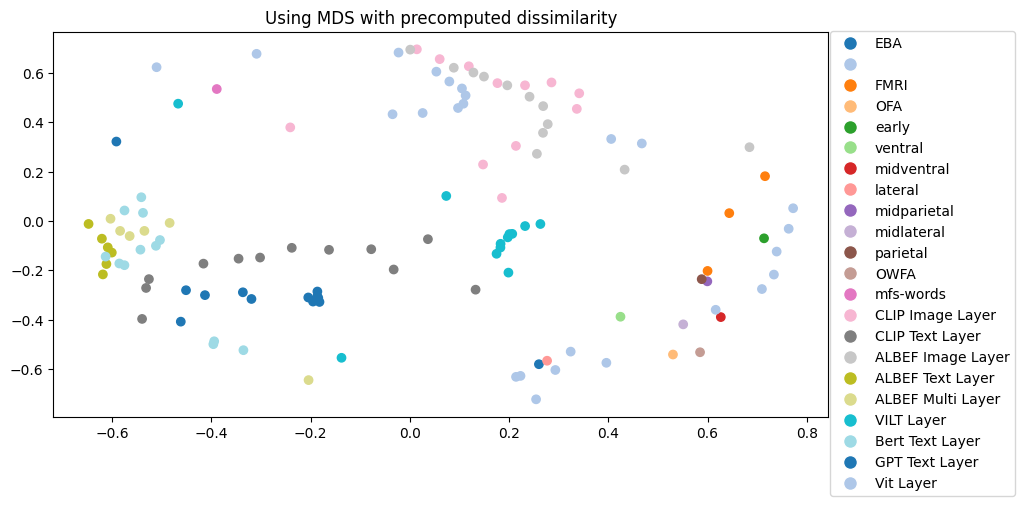

In [25]:
embedding = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)
arr = df.to_numpy()
arr = 1 - arr
transformed = embedding.fit_transform(arr)
df_t = pd.DataFrame(transformed, columns=['x', 'y'])
df_t['Name'] = list(df.index)
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI-Visual' if x in avg_visual.keys() else 'FMRI-Words' if x in avg_words.keys() else 'FMRI-Faces' if x in avg_faces.keys() else 'FMRI-Places' if x in avg_places.keys() else 'FMRI-Streams' if x in avg_streams.keys() else 'FMRI-Body' if x in avg_body.keys() else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))
plt.figure(figsize=(10, 5))
sns.scatterplot(x='x', y='y', data=df_t, hue='data')
plt.title('Using MDS with precomputed dissimilarity')
handles, labels = plt.gca().get_legend_handles_labels()
legend = plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1.02))
plt.show()

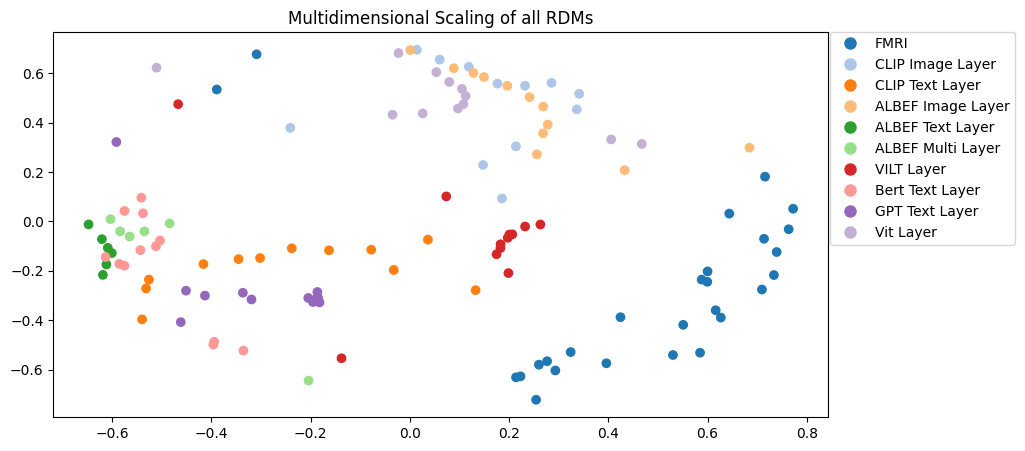

In [29]:
embedding = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto', random_state=42)

arr = df.to_numpy()
arr = 1 - arr

transformed = embedding.fit_transform(arr)

df_t = pd.DataFrame(transformed, columns=['x', 'y'])
df_t['Name'] = list(df.index)
# df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI-Visual' if x in avg_visual.keys() else 'FMRI-Words' if x in avg_words.keys() else 'FMRI-Faces' if x in avg_faces.keys() else 'FMRI-Places' if x in avg_places.keys() else 'FMRI-Streams' if x in avg_streams.keys() else 'FMRI-Body' if x in avg_body.keys() else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))
df_t['data'] = df_t['Name'].apply(lambda x: 'FMRI' if x in avg.keys() else ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))
distinct_values = df_t['data'].unique()

# Create a color palette using Seaborn with enough distinct colors
n_colors = len(distinct_values)
cmap = ListedColormap(sns.color_palette("tab20", n_colors=n_colors).as_hex())

# Create a dictionary to map categories to colormap indices
color_mapping = {val: cmap(i) for i, val in enumerate(distinct_values)}

# Map category names to colormap colors
df_t['color'] = df_t['data'].map(color_mapping)

plt.figure(figsize=(10, 5))

scatter = plt.scatter(df_t['x'], df_t['y'], c=df_t['color'], marker='o')
plt.title('Multidimensional Scaling of all RDMs')

# Create a legend for the color mapping
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[val], markersize=10, label=val) for val in distinct_values]
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1.02))

plt.show()


In [31]:
distinct_values

array(['FMRI', 'CLIP Image Layer', 'CLIP Text Layer', 'ALBEF Image Layer',
       'ALBEF Text Layer', 'ALBEF Multi Layer', 'VILT Layer',
       'Bert Text Layer', 'GPT Text Layer', 'Vit Layer'], dtype=object)